# Correlation_Coefficient

1. Pearson
2. 절대값 top3 by figure
3. Correlation Matrix

In [2]:
from google.colab import drive
drive.mount("/content/mydrive/")
%cd /content/mydrive/MyDrive/LTSF_Linear

Drive already mounted at /content/mydrive/; to attempt to forcibly remount, call drive.mount("/content/mydrive/", force_remount=True).
/content/mydrive/MyDrive/LTSF_Linear


In [3]:
import os
from glob import glob
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
root_path = "dataset/Water_Week"
dir_list = sorted(os.listdir(root_path))

## (1) Pearson Correlation Coefficient


 >**${\rho}_{X, Y} = \frac{cov(X, Y)} {(std_{X}std_{Y})} \quad (-1<={\rho}_{X, Y}<=1)$**
<br>

- 두 변 수 X와 Y간의 선형 상관 관계를 계량화한 수치
- **-1**: 완벽한 음의 선형 상관 관계
- **0** : 선형 상관 관계 없음
- **+1** : 완벽한 양의 선형 상관 관계



## (2) 절대값 top3 by figure


- C001팔당2취
>1. [Geosmin, 2-MIB]
>2.  [diatomeae, algae]
>3. [alkalinity, EC]

- D001청주정
>1. [water_temp, pH]
>2. [EC, turbidity]
>3. [alkalinity, water_temp]

- D002구미
>1.[water_temp, EC]
>2. [EC, turbidity]
>3. [pH, EC]

- D003고령
>1. [alkalinity, turbidity]
>2. [water_temp, EC]
>3. [alkalinity, water_temp]

- D004주암
>1. [alkalinity, EC]
>2. [water_temp, pH]
>3. [Mn, water_temp]

- E003본포
>1. [up_water_temp, temp]
>2. [up_EC, EC]
>3. [up_pH, pH]

- E004남강
>1. [dw_water_volume, dw_water_level]
>2. [dw_water_rates, dw_water_level]
>3. [dw_water_rates, dw_water_volume]

## (3) Correlation Matrix

<ipython-input-5-84496503a03c>:29: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(clean_input.corr(method="pearson"), dtype=np.bool)


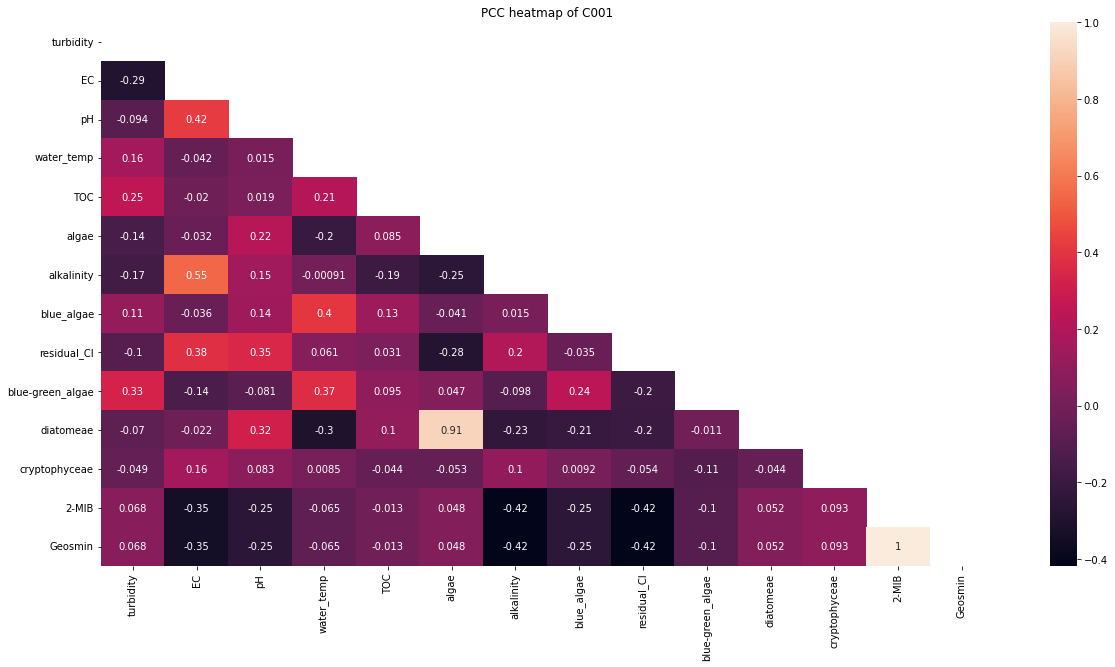

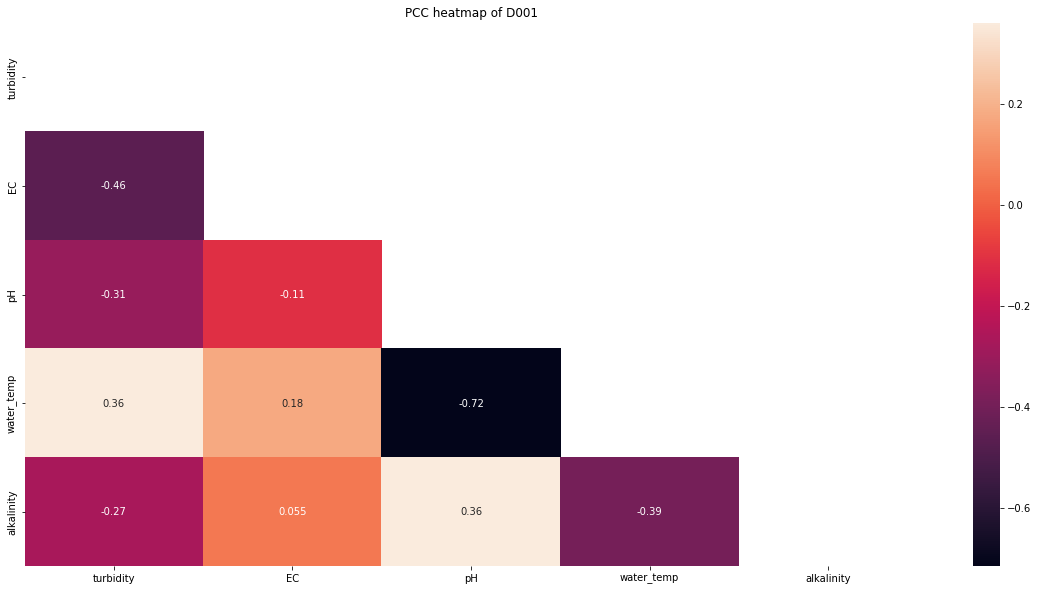

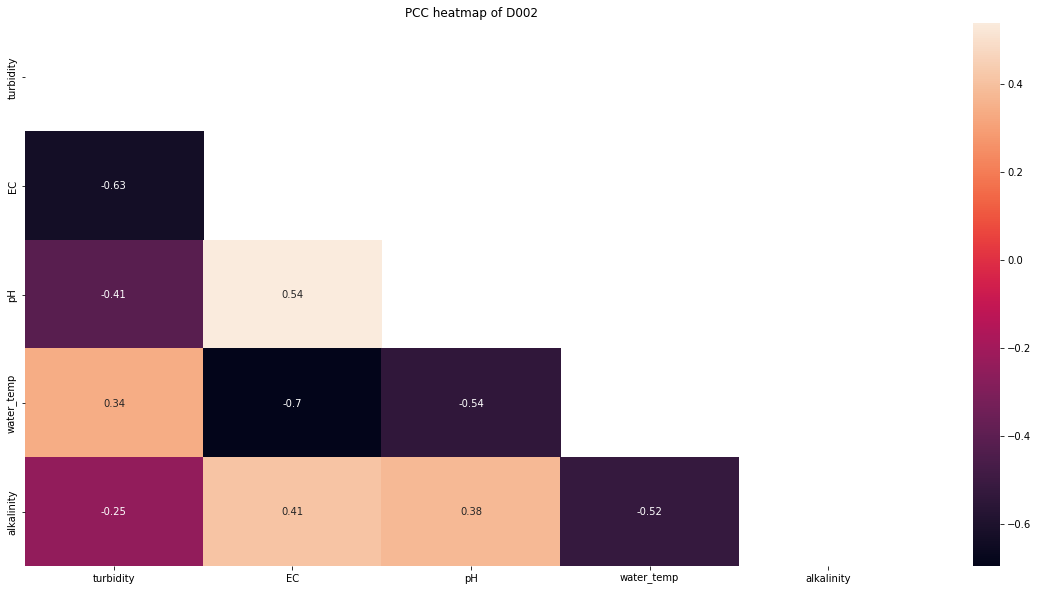

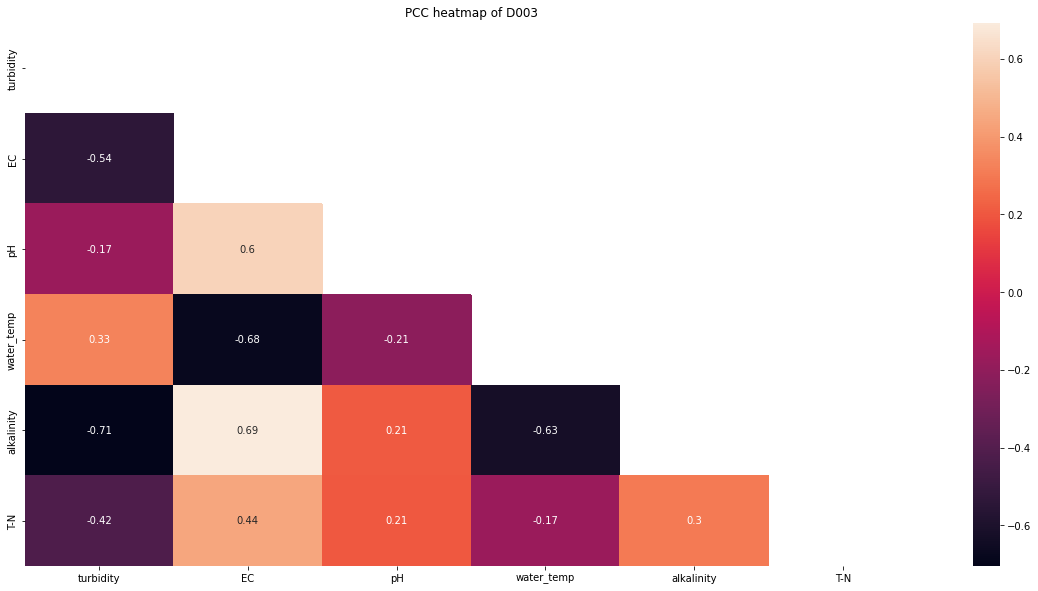

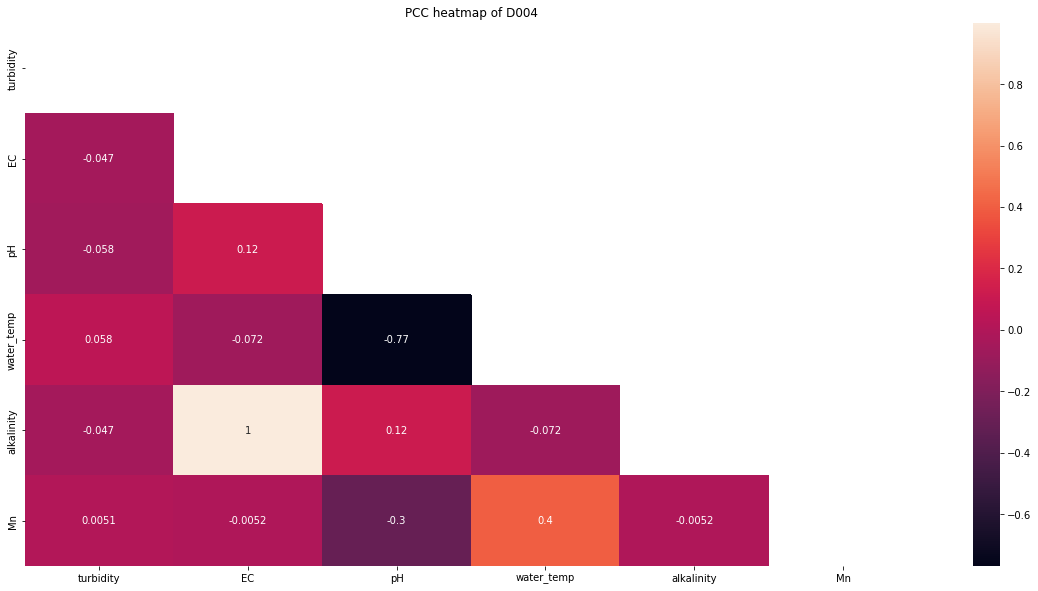

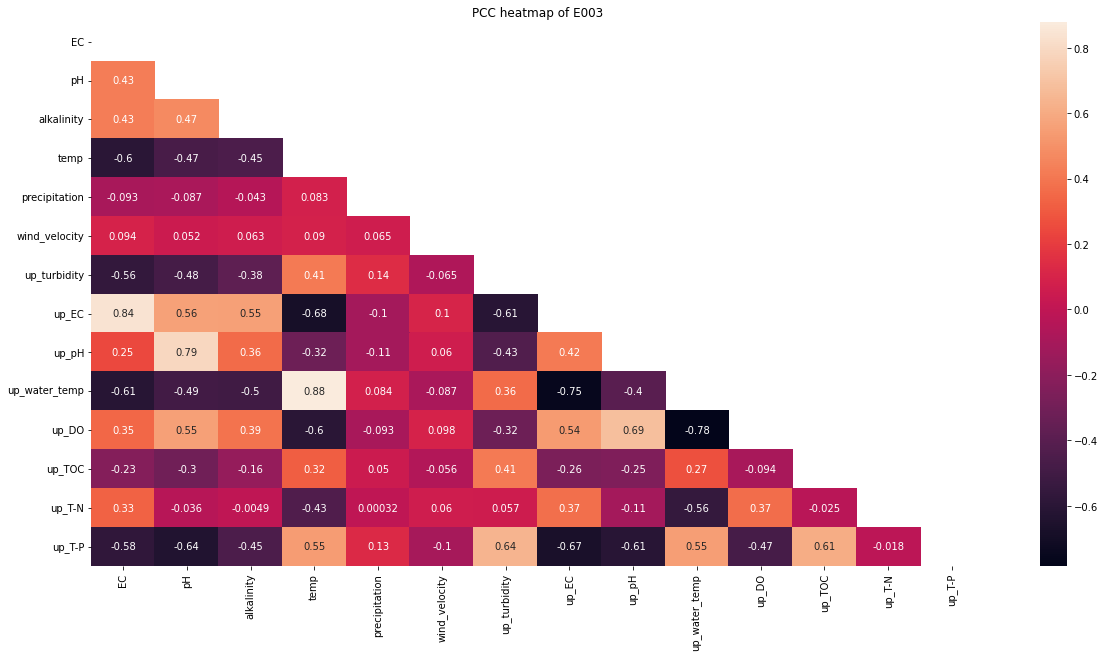

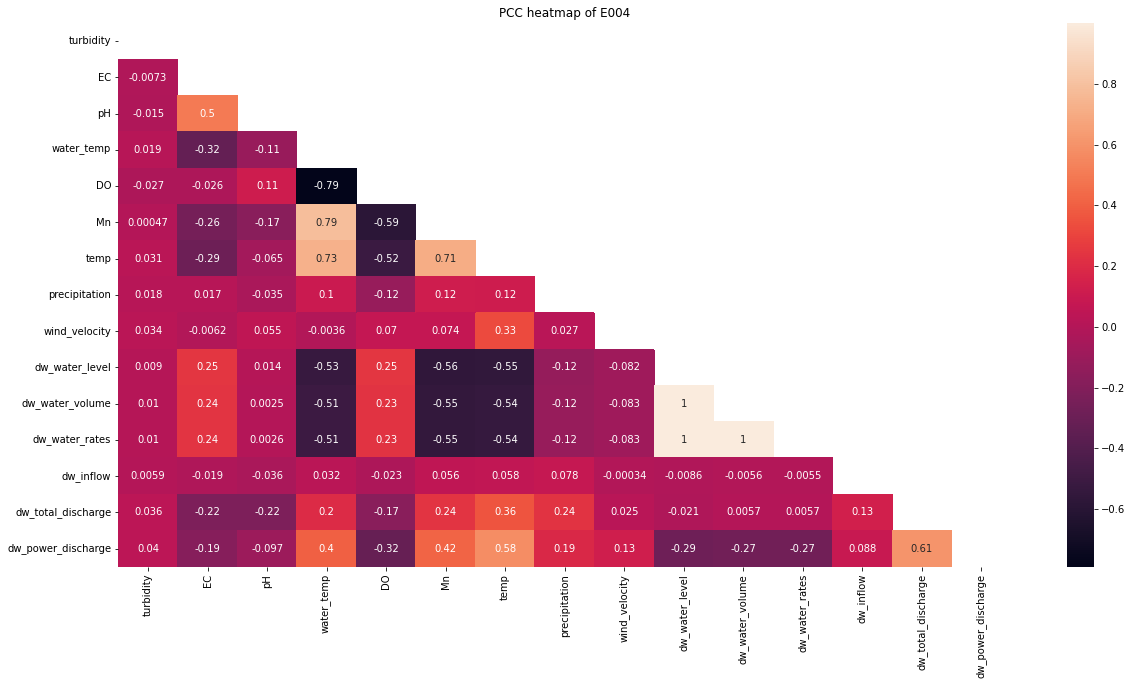

In [5]:
for dir in dir_list:
    data_list = sorted(glob(os.path.join(root_path, dir, "csv/*.csv")))

    df_raw = pd.DataFrame()
    for file in data_list:
        df_ = pd.read_csv(file)
        df_raw = pd.concat([df_raw, df_], axis=0, ignore_index=True)
    num_cols = list(df_raw.select_dtypes(include=np.number).columns)

    label_list = sorted(glob(os.path.join(root_path, dir, "hw3_json/*.json")))

    target_vals = []
    for js in label_list:
        with open(js, 'r') as f:
            label = json.load(f)
        input_cols = label['h']['input_serial'].split(',')
        target_cols = [k for k,v in label['w'].items() if(v is not None) & (k in num_cols)]
        vals = [label['w'][k] for k in target_cols]
        target_vals.append(vals)
    target_vals = np.array(target_vals)

    input = df_raw[num_cols]

    # drop empty columns
    clean_input = input.copy()
    clean_input.dropna(axis=1, how="all", inplace=True)

    # set mask to show lower triangle
    mask = np.zeros_like(clean_input.corr(method="pearson"), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=(20, 10))
    sns.heatmap(clean_input.corr(method="pearson"), annot=True, mask=mask)
    plt.title(f"PCC heatmap of {dir[:4]}")
    plt.show() 